# CH05.퍼셉트론 실습

## 실습 순서

0. 사용할 라이브러리와 패키지 불러오기

1.   (데이터) 데이터 불러오기
2.  (데이터) 학습 데이터와 테스트 데이터 구분하기
3. (모델) 모델 구성하기
4. (모델 학습) 모델 학습하기
5. (모델 성능 평가) 모델 성능 평가하기
6. (결과) 모델 동작 시각화하기

## [실습 5-1] scikit-learn 라이브러리를 이용한 퍼셉트론



### 0. 사용할 라이브러리와 패키지 불러오기




In [1]:
# numpy, matplotlib을 각각 np, pl로 재지정해 불러온다.
# scikit-learn에서 사용할 패키지를 불러온다.
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import numpy as np

### 1. 데이터 불러오기



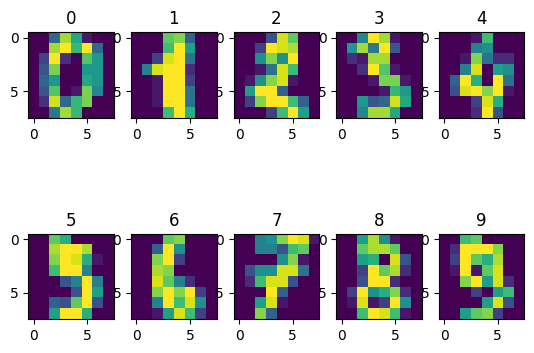

In [2]:
# 필기체 숫자 데이터셋을 불러온다.
X, y = load_digits(return_X_y = True)

# 상단의 숫자는 실제값(y)를 의미하며, 이미지는 838 픽셀로 이루어진 입력 데이터를 의미한다.
rows = 2; cols = 5
fig = plt.figure()
for i in range(10):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(X[i].reshape(8, 8))
    ax.set_title(str(i))
plt.show()

### 2. 학습 데이터와 테스트 데이터 구분하기




In [3]:
# X(입력 데이터)와 y(실제값)을 학습 데이터셋과 테스트 데이터셋으로 분할한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### 3. 모델 구성하기




In [4]:
# scikit-learn 라이브러리의 퍼셉트론 모델을 불러온다.
classifier = Perceptron()

### 4. 모델 학습하기




In [5]:
# fit 함수를 통해 모델을 학습한다.
# fit 함수에는 1) 가중치 초기화 2) 손실 함수 계산 3) 가중치 업데이트가 모두 구현되어 있다.
classifier.fit(X_train, y_train)
w = classifier.coef_
w_0 = classifier.intercept_

### 5. 모델 성능 평가하기




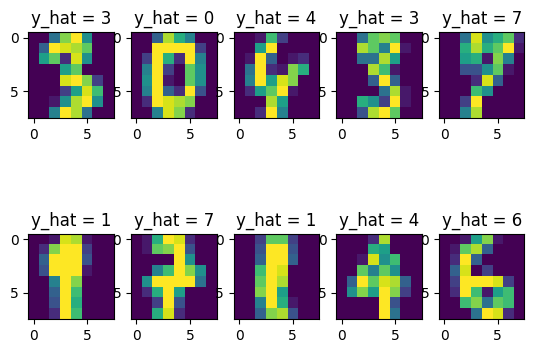

In [6]:
# predict 함수를 통해 퍼셉트론으로 얻은 예측값을 추출한다.
y_pred = classifier.predict(X_test)

# 학습 결과를 시각화한다.
rows = 2; cols = 5
fig = plt.figure()
fig.tight_layout(w_pad = 100)
for i in range(10):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(X_test[i].reshape(8, 8))
    ax.set_title("y_hat = " + str(y_pred[i]))
plt.show()

### 6. 모델 동작 시각화하기




              precision    recall  f1-score   support

     digit 0       1.00      0.98      0.99        49
     digit 1       0.74      1.00      0.85        43
     digit 2       0.95      0.98      0.96        42
     digit 3       0.98      0.96      0.97        46
     digit 4       0.95      0.90      0.92        41
     digit 5       0.92      0.97      0.95        36
     digit 6       0.88      0.96      0.92        54
     digit 7       0.98      0.98      0.98        44
     digit 8       0.97      0.67      0.79        51
     digit 9       0.98      0.91      0.94        44

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.94      0.93      0.93       450



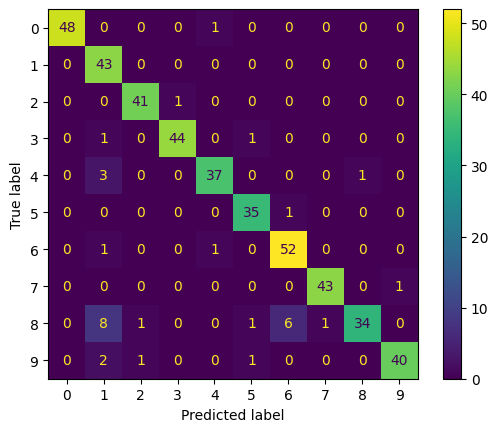

In [7]:
# 혼동 행렬을 통해 성능을 확인한다.
target_names = ['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4',
                'digit 5', 'digit 6', 'digit 7', 'digit 8', 'digit 9']
print(classification_report(y_test, y_pred, target_names = target_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## [실습 5-2] 함수를 직접 정의해 구현한 퍼셉트론




### 1. 데이터 불러오기



In [8]:
# 필기체 숫자 데이터셋을 불러온다.
X, y = load_digits(return_X_y = True)

### 2. 학습 데이터와 테스트 데이터 구분하기




In [9]:
# X(입력 데이터)와 y(실제값)을 학습 데이터셋과 테스트 데이터셋으로 분할한다.
# 직접 구현에서는 10개의 숫자 분류가 아닌 이진 분류를 진행한다.
# 따라서 이에 맞는 형태의 데이터로의 변환이 필요하다.
def divideData(X, y, targetClass):
    idx = np.where(y == targetClass)[0]
    newY = np.zeros(len(y))
    newY[idx] = 1
    X_train, X_test, y_train, y_test = train_test_split(X, newY, test_size = 0.25, random_state = 42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = divideData(X, y, 3)

### 3. 모델 구성하기




In [10]:
# 퍼셉트론 모델 학습을 위해 필요한 다양한 함수들을 선언한다.
m, n = X_train.shape
w = np.zeros((n, 1))
lr = 0.1
y_train = y_train.reshape(m, 1)

def sigmoid(x): # 시그모이드 함수 구현
		return 1.0/(1 + np.exp(-x))

def BCE_loss(y, y_hat): # 이진 크로스 엔트로피 함수 구현
		loss = np.mean(y * (np.log1p(y_hat)) + (1 - y) * np.log1p(1 - y_hat))
		return -loss

def gradient_descent(X, y, y_hat): # 경사하강법 함수 구현
		global w
		dw = -(np.dot(X.T, (y - y_hat)))
		w -= lr*dw

### 4. 모델 학습하기




In [11]:
# 구현한 함수를 통해 모델을 학습한다.
# 이 함수에는 1) 가중치 초기화 2) 손실 함수 계산 3) 가중치 업데이트가 모두 구현되어 있다.
for epoch in range(100):
		y_hat = sigmoid(np.dot(X_train, w))
		loss = BCE_loss(y_train, y_hat)
		gradient_descent(X_train, y_train, y_hat)
print(w)

[[ 0.00000000e+00]
 [-8.40849119e+00]
 [-1.07435274e+02]
 [-8.21119504e+00]
 [ 3.56011188e+02]
 [ 1.24255781e+02]
 [-5.11151984e+01]
 [-1.40895081e+01]
 [-7.30006099e+00]
 [-1.79092126e+01]
 [ 1.90420128e+02]
 [-4.77229876e+01]
 [ 1.05173489e+02]
 [ 3.41793587e+02]
 [ 1.70067352e+02]
 [-8.62524073e+00]
 [ 2.50000000e-01]
 [-6.71563119e+01]
 [-4.73228341e+02]
 [-3.88701297e+02]
 [ 3.05665811e+02]
 [-1.94451957e+02]
 [-9.03141558e+01]
 [-7.06646216e+00]
 [-1.00000000e-01]
 [-1.88798221e+02]
 [-6.22337517e+02]
 [-1.86604808e+01]
 [ 1.12604484e+02]
 [-5.04065510e+02]
 [-3.39907042e+02]
 [-1.50000000e-01]
 [ 0.00000000e+00]
 [-1.29364786e+02]
 [-2.76605387e+02]
 [-6.28167634e+01]
 [ 2.46948723e+02]
 [ 2.79733008e+01]
 [-1.25512709e+02]
 [ 0.00000000e+00]
 [-7.50000000e-01]
 [-7.16474852e+00]
 [-3.63622095e+02]
 [-7.58604391e+02]
 [ 1.85036522e+01]
 [ 3.76507404e+02]
 [ 3.78869963e+02]
 [-2.20000000e+00]
 [-6.00000000e-01]
 [-2.37400796e+00]
 [-2.74949623e+01]
 [-1.90163104e+02]
 [-3.8885181

<ipython-input-10-b70c4e90fc8b>:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-x))


### 5. 모델 성능 평가하기




<ipython-input-10-b70c4e90fc8b>:8: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-x))


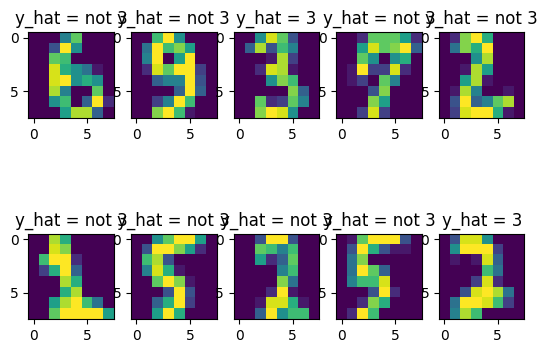

In [12]:
# predict 함수를 통해 퍼셉트론으로 얻은 예측값을 추출해 테스트 데이터로 평가한다.
def predict(X, w):
    preds = sigmoid(np.dot(X, w))
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)
y_pred = predict(X_test, w)

# 학습 결과를 시각화한다.
rows = 2; cols = 5
fig = plt.figure()
for i in range(10):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(X_test[i].reshape(8, 8))
    if y_pred[i] == 1:
        ax.set_title("y_hat = 3")
    else:
        ax.set_title("y_hat = not 3")
plt.show()

### 6. 모델 동작 시각화하기



              precision    recall  f1-score   support

     digit 3       1.00      0.98      0.99       404
      Others       0.85      0.98      0.91        46

    accuracy                           0.98       450
   macro avg       0.92      0.98      0.95       450
weighted avg       0.98      0.98      0.98       450



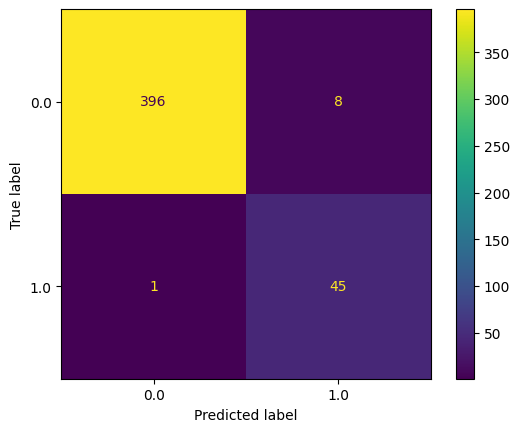

In [13]:
# 혼동 행렬을 통해 성능을 확인한다.
target_names = ['digit 3', 'Others']
print(classification_report(y_test, y_pred, target_names = target_names))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)